In [1]:
import datetime
import numpy as np
import os, time
from datetime import datetime
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div(
    html.Div([
        html.H4('CuMnAs'),
        html.Div(id='live-update-text'),
        dcc.Graph(id='live-update-graph'),
        dcc.Interval(
            id='interval-component',
            interval=1*1000, # in milliseconds
            n_intervals=0
        )
    ])
)

'''
@app.callback(Output('live-update-text', 'children'),
              [Input('interval-component', 'n_intervals')])
def update_metrics(n):
    lon, lat, alt = satellite.get_lonlatalt(datetime.datetime.now())
    style = {'padding': '5px', 'fontSize': '16px'}
    return [
        html.Span('Longitude: {0:.2f}'.format(lon), style=style),
        html.Span('Latitude: {0:.2f}'.format(lat), style=style),
        html.Span('Altitude: {0:0.2f}'.format(alt), style=style)
    ]
'''

# Multiple components can update everytime interval gets fired.
@app.callback(Output('live-update-graph', 'figure'),
              [Input('interval-component', 'n_intervals')])



def update_graph_live(n):
    

    path = r"D:/P074n42/data/"
    #path = r"D:/P074n35B2/data/"
    filename = max((os.path.join(root,f) for root,_,the_files in os.walk(path) for f in the_files if f.lower().endswith(".dat")),key=os.path.getctime)[:-4]
    
    #filename = r"D:/Q024/Q024n5F4_Ab1"

    measurement = np.loadtxt("{:}.dat".format(filename))
    X = measurement[:,0]
    R4 = measurement[:,3]/ measurement[:,2]
    R2 = measurement[:,1]/ measurement[:,2]

    fig = go.Figure(data=go.Scatter(x=X, y=R2))
    
    return fig


import datetime
import numpy as np
import os, time

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly
from plotly.subplots import make_subplots
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div(
    html.Div([
        html.H4('CuMnAs'),
        html.Div(id='live-update-text'),
        dcc.Graph(id='live-update-graph'),
        dcc.Interval(
            id='interval-component',
            interval=1*1000, # in milliseconds
            n_intervals=0
        )
    ])
)

'''
@app.callback(Output('live-update-text', 'children'),
              [Input('interval-component', 'n_intervals')])
def update_metrics(n):
    lon, lat, alt = satellite.get_lonlatalt(datetime.datetime.now())
    style = {'padding': '5px', 'fontSize': '16px'}
    return [
        html.Span('Longitude: {0:.2f}'.format(lon), style=style),
        html.Span('Latitude: {0:.2f}'.format(lat), style=style),
        html.Span('Altitude: {0:0.2f}'.format(alt), style=style)
    ]
'''

# Multiple components can update everytime interval gets fired.
@app.callback(Output('live-update-graph', 'figure'),
              [Input('interval-component', 'n_intervals')])



def update_graph_live(n):
    

    path = r"D:/P074n42/data/"
    #path = r"D:/P074n35B2/data/"
    datname = max((os.path.join(root,f) for root,_,the_files in os.walk(path) for f in the_files if f.lower().endswith(".dat")),key=os.path.getctime)[:-4]
    pulname = max((os.path.join(root,f) for root,_,the_files in os.walk(path) for f in the_files if f.lower().endswith(".pulses")),key=os.path.getctime)[:-7]
    
    #datname = "D:/P074n35\P074n35C3_Ab2_25um"
    #pulname = "D:/P074n35\P074n35C3_Ab2_25um"
    
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True)
    measurement = np.loadtxt("{:}.dat".format(datname))
    pulses = np.loadtxt("{:}.pulses".format(pulname))
    X_p = pulses[:,0]
    I_p = pulses[:,1]
    
    X = measurement[:,0]
    R4 = measurement[:,3]/ measurement[:,2]
    #R4 = measurement[:,3]
    R2 = measurement[:,1]/ measurement[:,2]
    R3 = measurement[:,2]
    T = measurement[:,4]
    fig.add_trace(go.Scatter(x=X-X[0], y=R4), row =1, col=1)
    fig.add_trace(go.Scatter(x=X_p-X[0], y=I_p, mode='markers'), row =2, col=1)
    fig.add_trace(go.Scatter(x=X-X[0], y=T), row =3, col=1)
    fig.update_layout(showlegend=False)
    
    return fig



#app.run_server(mode='inline')
app.run_server()


Dash app running on http://127.0.0.1:8050/


In [4]:
#path = r"D:/P074n35B2/data/experiment/320"    
#datname = max((os.path.join(root,f) for root,_,the_files in os.walk(path) for f in the_files if f.lower().endswith(".dat")),key=os.path.getctime)[:-4]
#pulname = max((os.path.join(root,f) for root,_,the_files in os.walk(path) for f in the_files if f.lower().endswith(".pulses")),key=os.path.getctime)[:-7]

name = 'B235n3D2_Aa1'
datname = "D:/O010n12/data/"+name
pulname = "D:/O010n12/data/"+name
#datname = "D:/P074n35\P074n35C3_Ac1_6um"
#pulname = "D:/P074n35\P074n35C3_Ac1_6um"

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)
measurement = np.loadtxt("{:}.dat".format(datname))
pulses = np.loadtxt("{:}.pulses".format(pulname))
X_p = pulses[:,0]
I_p = pulses[:,1]

X = measurement[:,0]
R4 = measurement[:,3]/ measurement[:,2]
#R4 = measurement[:,3]
R2 = measurement[:,1]/ measurement[:,2]
R3 = measurement[:,2]
T = measurement[:,4]
fig.add_trace(go.Scattergl(x=X-X[0], y=R4/17), row =1, col=1)
fig.add_trace(go.Scattergl(x=X_p-X[0], y=I_p, mode='markers'), row =2, col=1)
fig.add_trace(go.Scattergl(x=X-X[0], y=T), row =3, col=1)
fig.update_layout(showlegend=False)
fig.show()

In [13]:
path = r"D:/P074n35"    
datname = max((os.path.join(root,f) for root,_,the_files in os.walk(path) for f in the_files if f.lower().endswith(".dat")),key=os.path.getctime)[:-4]
pulname = max((os.path.join(root,f) for root,_,the_files in os.walk(path) for f in the_files if f.lower().endswith(".pulses")),key=os.path.getctime)[:-7]
measurement = np.loadtxt("{:}.dat".format(datname))
pulses = np.loadtxt("{:}.pulses".format(pulname))

In [9]:
#path = r"D:/P074n35"    
#datname = max((os.path.join(root,f) for root,_,the_files in os.walk(path) for f in the_files if f.lower().endswith(".dat")),key=os.path.getctime)[:-4]
#pulname = max((os.path.join(root,f) for root,_,the_files in os.walk(path) for f in the_files if f.lower().endswith(".pulses")),key=os.path.getctime)[:-7]

name = 'P074n35C4_Ga1'
datname = "D:/P074n35/"+name
pulname = "D:/P074n35/"+name
#datname = "D:/P074n35\P074n35C3_Ac1_6um"
#pulname = "D:/P074n35\P074n35C3_Ac1_6um"

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)
measurement = np.loadtxt("{:}.dat".format(datname))
pulses = np.loadtxt("{:}.pulses".format(pulname))
X_p = pulses[:,0]
I_p = pulses[:,1]

X = measurement[:,0]
R4 = measurement[:,3]/ measurement[:,2]
#R4 = measurement[:,3]
R2 = measurement[:,1]/ measurement[:,2]
R3 = measurement[:,2]
T = measurement[:,4]
fig.add_trace(go.Scattergl(x=X-X[0], y=R4), row =1, col=1)
fig.add_trace(go.Scattergl(x=X_p-X[0], y=I_p, mode='markers'), row =2, col=1)
fig.add_trace(go.Scattergl(x=X-X[0], y=T), row =3, col=1)
fig.update_layout(showlegend=False)
fig.show()

In [2]:
path = r"D:/P074n36D4/data/"    
datname = max((os.path.join(root,f) for root,_,the_files in os.walk(path) for f in the_files if f.lower().endswith(".dat")),key=os.path.getctime)[:-4]
pulname = max((os.path.join(root,f) for root,_,the_files in os.walk(path) for f in the_files if f.lower().endswith(".pulses")),key=os.path.getctime)[:-7]

#name = 'P074n35C4_Ga2'
#datname = "D:/P074n35/"+name
#pulname = "D:/P074n35/"+name
#datname = "D:/P074n35\P074n35C3_Ac1_6um"
#pulname = "D:/P074n35\P074n35C3_Ac1_6um"

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)
measurement = np.loadtxt("{:}.dat".format(datname))
pulses = np.loadtxt("{:}.pulses".format(pulname))
X_p = pulses[:,0]
I_p = pulses[:,1]

X = measurement[:,0]
R4 = measurement[:,3]/ measurement[:,2]
#R4 = measurement[:,3]
R2 = measurement[:,1]/ measurement[:,2]
R3 = measurement[:,2]
T = measurement[:,4]
fig.add_trace(go.Scattergl(x=X-X[0], y=R4), row =1, col=1)
fig.add_trace(go.Scattergl(x=X_p-X[0], y=I_p, mode='markers'), row =2, col=1)
fig.add_trace(go.Scattergl(x=X-X[0], y=T), row =3, col=1)
fig.update_layout(showlegend=False)
fig.show()


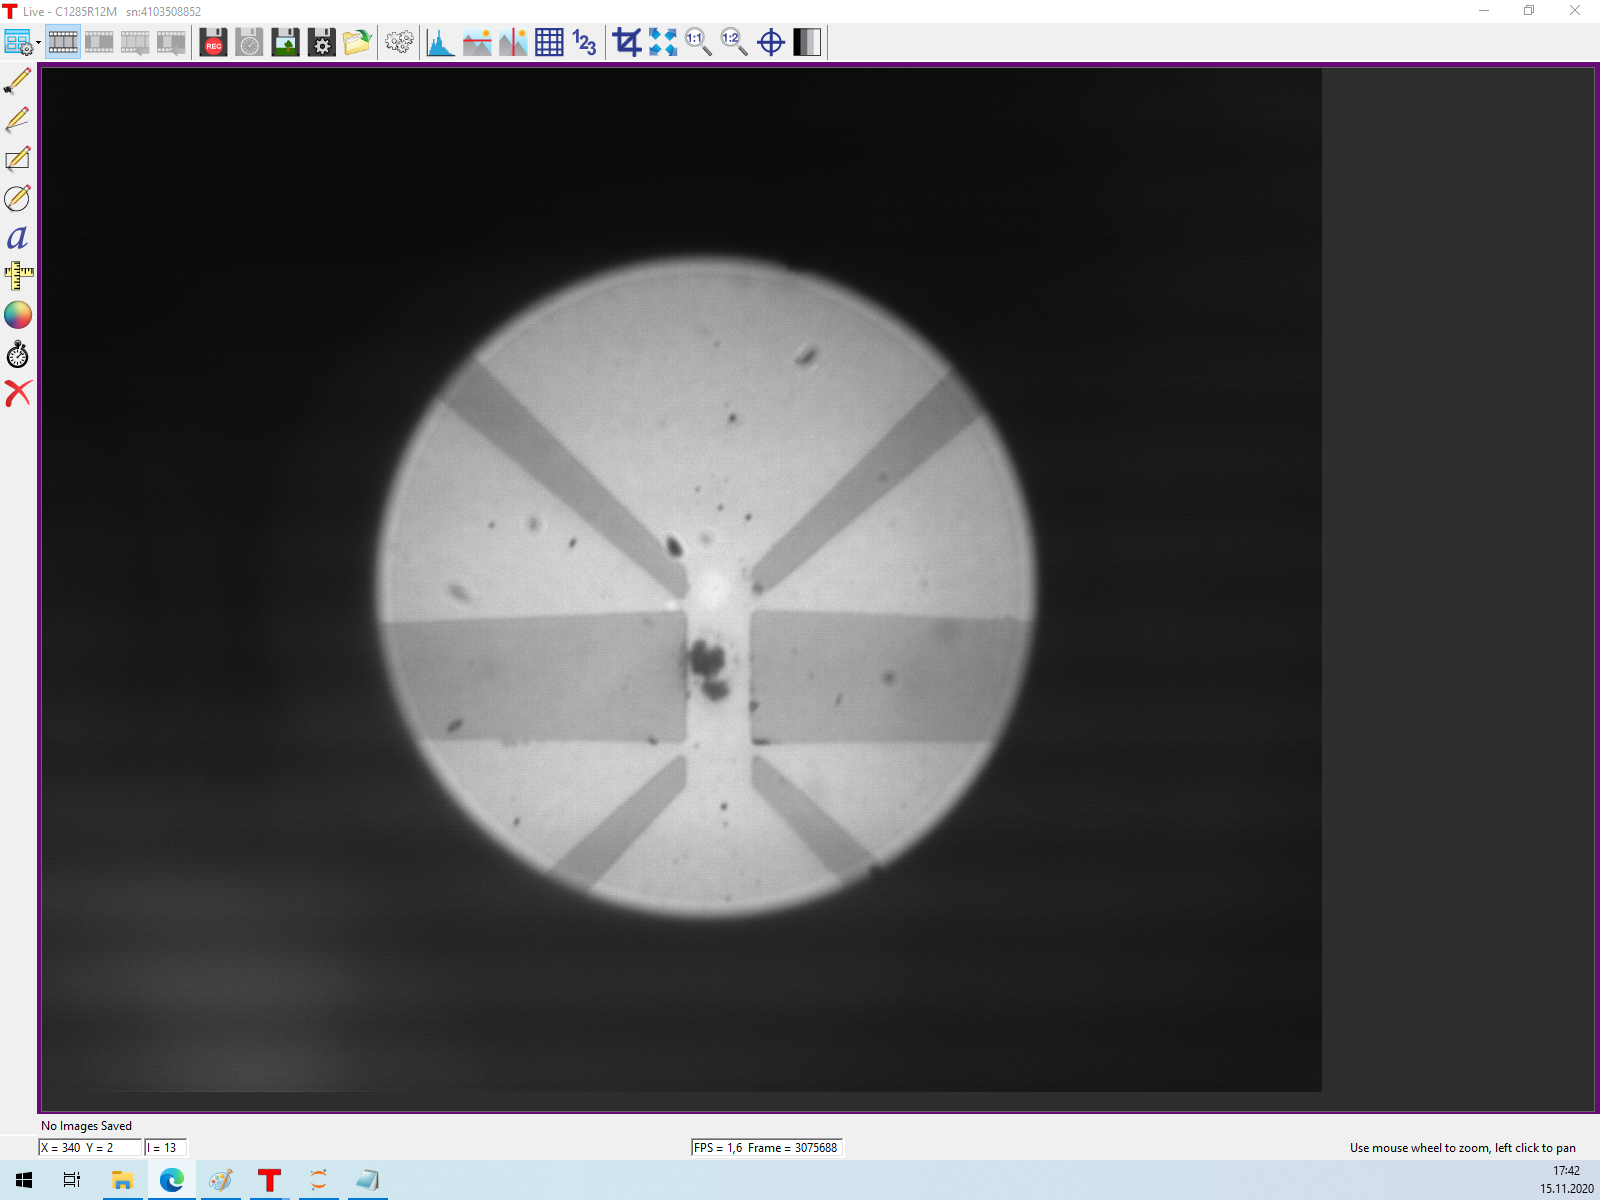

In [102]:
datname = "D:/P074n35/P074n35C4_mapAfterKill"

Rmap = np.loadtxt("{:}.dat".format(datname))
X = Rmap[:,0]
Y = Rmap[:,1]
I = Rmap[:,2]
X = (X-X[0])*1000
#X = X[::-1]
Y = (Y-Y[0])*1000
Y = Y[::-1]
import plotly.graph_objects as go
from PIL import Image
img = Image.open("D:/P074n35/P074n35C4_predMapou_mw.png")

fig = go.Figure(data = go.Heatmap(x = X, y = Y, z = I, zsmooth = 'best', opacity=0.9))
#fig.update_layout(yaxis=dict(range=[0,0.01]))
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1
)

fig.add_layout_image(
        dict(
            source=img,
            xref="x",
            yref="y",
            x=-129,
            y=128,
            sizex=300,
            sizey=300,
            #sizing="stretch",
            opacity=1,
            layer="below")
)

fig.show()